# Machine Learning and Data Science (MALDSAC) 2024

## Gradient Descent from Scratch:
---------------

In [ ]:
import torch
import matplotlib.pyplot as plt

In [ ]:
xs = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7.])
ys = torch.tensor([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37])

In [ ]:
def regression(my_x, my_m, my_b):
    return my_m*my_x + my_b

In [ ]:
m = torch.tensor([0.9]).requires_grad_()
b = torch.tensor([0.1]).requires_grad_()

### **Step 1**: Forward pass

In [ ]:
yhats = regression(xs, m, b)
yhats

tensor([0.1000, 1.0000, 1.9000, 2.8000, 3.7000, 4.6000, 5.5000, 6.4000],
       grad_fn=<AddBackward0>)

### **Step 2**: Compare $\hat{y}$ with true $y$ to calculate loss value $L$

Mean squared error loss value: $$L = \frac{1}{n} \sum_{i=1}^n (\hat{y_i}-y_i)^2 $$

In [ ]:
def mse(my_yhat, my_y):
    sigma = torch.sum((my_yhat - my_y)**2)
    return sigma/len(my_y)

In [ ]:
L = mse(yhats, ys)
L

tensor(19.6755, grad_fn=<DivBackward0>)

### **Step 3**: Use autodiff to calculate gradient of $L$ w.r.t. parameters

In [ ]:
L.backward()

In [ ]:
m.grad

tensor([36.3050])

The derivative $\frac{\partial L}{\partial m} = 36.3$ illustrates that an increase in $m$ leads to a substantial increase in $L$.

In [ ]:
b.grad

tensor([6.2650])

Simultaneously, the derivative $\frac{\partial L}{\partial b} = 6.26$ suggests that an increase in $b$ is associated with a rise in $L$ as well, though to a lesser extent compared to the effect of $m$.

By employing partial derivatives, we can alternatively determine these identical slopes without relying on automated numerical computation:

$$ \frac{\partial L}{\partial m} = \frac{2}{n} \sum (\hat{y}_i - y_i) \cdot x_i $$

In [ ]:
2*1/len(ys)*torch.sum((yhats - ys)*xs)

tensor(36.3050, grad_fn=<MulBackward0>)

$$ \frac{\partial C}{\partial b} = \frac{2}{n} \sum (\hat{y}_i - y_i) $$

In [ ]:
2*1/len(ys)*torch.sum(yhats - ys)

tensor(6.2650, grad_fn=<MulBackward0>)

The gradient of the loss function L denoted as $\nabla L$ is:

In [ ]:
gradient = torch.tensor([[b.grad.item(), m.grad.item()]]).T
gradient

tensor([[ 6.2650],
        [36.3050]])

For convenience, model parameters are commonly represented as $\boldsymbol{\theta}$, which may take the form of a vector, a matrix, or an array of tensors with diverse dimensions, depending on the model. In the case of our simple linear model, a vector tensor suffices:

In [ ]:
theta = torch.tensor([[b, m]]).T
theta

tensor([[0.1000],
        [0.9000]])

Observe that the gradient $\nabla L$ can also be represented with respect to $\boldsymbol{\theta}$ as $\nabla_\boldsymbol{\theta} f(\boldsymbol{\theta})$.

Furthermore, it's worth mentioning that we transpose $\boldsymbol{\theta}$ for the sake of simplifying subsequent tensor operations, aligning with the machine learning convention to transpose the gradient, $\nabla L$.

Let's visualize the state of the most pertinent metrics in a single plot:

In [ ]:
def plot_regression(my_x, my_y, my_m, my_b, my_L, include_grad=True):
    """
    This function generates a labeled regression plot to visualize the relationship between
    input data points (my_x, my_y) and a linear regression model defined by parameters my_m
    (slope) and my_b (intercept). The cost my_L is also displayed in the title of the plot.
    Optionally, gradients of model parameters can be included in the plot labels.

    Parameters:
    - my_x: Input data points along the x-axis.
    - my_y: Corresponding target values along the y-axis.
    - my_m: Parameter representing the slope of the linear regression model.
    - my_b: Parameter representing the intercept of the linear regression model.
    - my_L: Loss value associated with the regression model.
    - include_grad: Boolean flag to specify whether to include gradients of model parameters in the labels.
    """

    # Generate title for the plot including the cost
    title = 'Loss value = {}'.format('%.3g' % my_L.item())

    # Customize labels based on whether gradients are included
    if include_grad:
        # Include gradients in labels
        xlabel = 'm = {}, m grad = {}'.format('%.3g' % my_m.item(), '%.3g' % my_m.grad.item())
        ylabel = 'b = {}, b grad = {}'.format('%.3g' % my_b.item(), '%.3g' % my_b.grad.item())
    else:
        # Exclude gradients from labels
        xlabel = 'm = {}'.format('%.3g' % my_m.item())
        ylabel = 'b = {}'.format('%.3g' % my_b.item())

    # Create a new figure and axis for plotting
    fig, ax = plt.subplots()

    # Set title, ylabel, and xlabel for the plot
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

    # Plot the input data points
    ax.scatter(my_x, my_y)

    # Calculate the regression line using the regression function
    x_min, x_max = ax.get_xlim()
    y_min = regression(x_min, my_m, my_b).detach().numpy()
    y_max = regression(x_max, my_m, my_b).detach().numpy()

    # Set x-axis limits
    ax.set_xlim([x_min, x_max])

    # Plot the regression line
    _ = ax.plot([x_min, x_max], [y_min, y_max], c='C01')

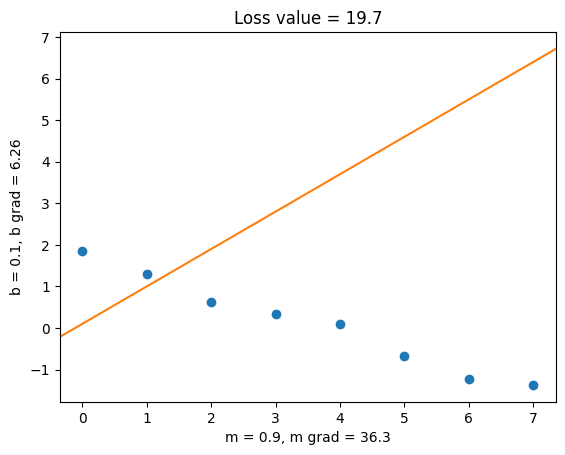

In [ ]:
plot_regression(xs, ys, m, b, L)

### **Step 4**: Gradient descent

In the initial training iteration, given derivatives $\frac{\partial L}{\partial m} = 36.3$ and $\frac{\partial L}{\partial b} = 6.26$, the most immediate improvement toward reducing the loss value $L$ involves diminishing the slope of the regression line, denoted as $m$. Additionally, a modest reduction in the $y$-intercept, represented by $b$, would also enhance the model's performance.

To precisely control the adjustments made to the model parameters $\boldsymbol{\theta}$, we introduce a **learning rate**. This hyperparameter is part to AIML models utilizing gradient descent and is commonly denoted as $\alpha$:

In [ ]:
lr = 0.01

We use the learning rate $\alpha$ to scale the gradient, i.e., $\alpha \nabla L$:

In [ ]:
scaled_gradient = lr * gradient
scaled_gradient

tensor([[0.0626],
        [0.3630]])

Now, considering our scaled gradient, we're equipped to fine-tune our model parameters $\boldsymbol{\theta}$ in ways that minimize the model's cost $L$.

For instance, when $\frac{\partial L}{\partial m} = 36.3$, indicates that increasing the slope parameter $m$ leads to an increase in the loss value $L$, we apply a *subtraction* operation to adjust each parameter individually, steering them towards the direction that reduces the loss value the most:

$$ \boldsymbol{\theta}' = \boldsymbol{\theta} - \alpha \nabla L$$"

In [ ]:
new_theta = theta - scaled_gradient
new_theta

tensor([[0.0374],
        [0.5369]])

To see these adjustments even more clearly, you can consider each parameter individually, e.g., $m' = m - \alpha \frac{\partial L}{\partial m}$:

In [ ]:
m - lr*m.grad

tensor([0.5369], grad_fn=<SubBackward0>)

...and $b' = b - \alpha \frac{\partial L}{\partial b}$:

In [ ]:
b - lr*b.grad

tensor([0.0374], grad_fn=<SubBackward0>)

With our updated parameters $\boldsymbol{\theta}$ now in hand, we can use them to check that they do indeed correspond to a decreased cost $L$:

In [ ]:
b = new_theta[0]
m = new_theta[1]

In [ ]:
L = mse(regression(xs, m, b), ys)

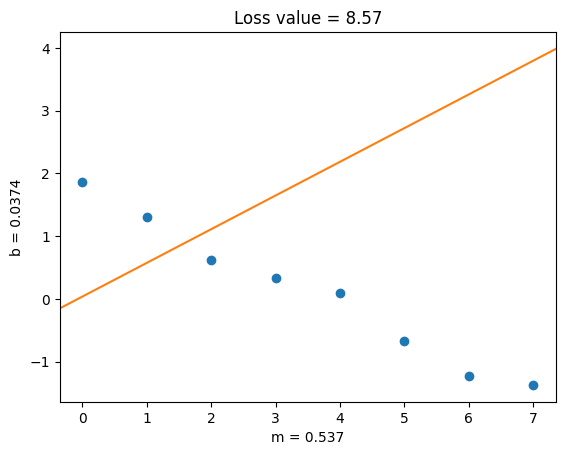

In [ ]:
plot_regression(xs, ys, m, b, L, include_grad=False) # Gradient of C hasn't been recalculated

### Training Pipeline

To initiate another iteration of gradient descent, we inform PyTorch of our intention to track gradients on the tensors `b` and `m`, similar to what we did at the beginning of the notebook when we initially created them:

In [ ]:
b.requires_grad_()
m.requires_grad_()

tensor([0.5369], requires_grad=True)

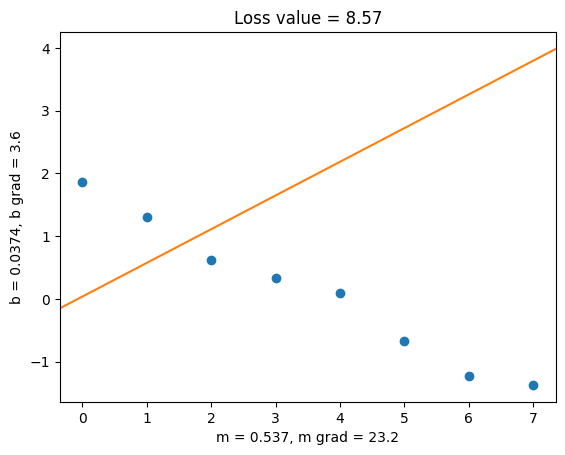

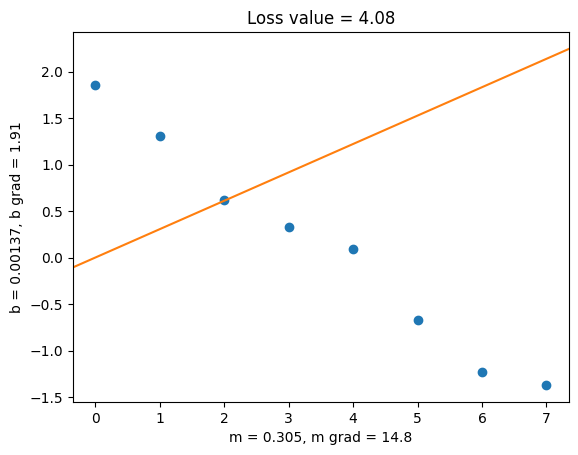

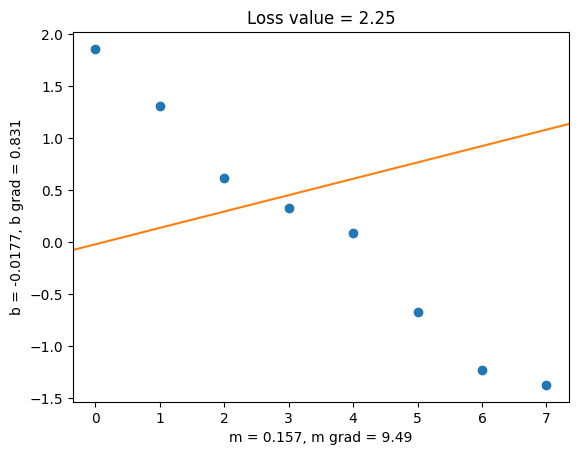

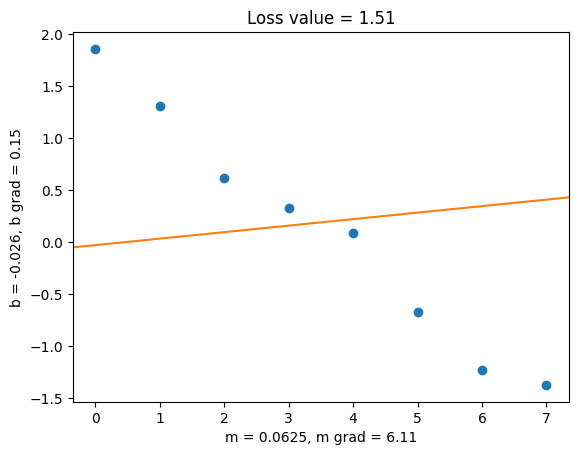

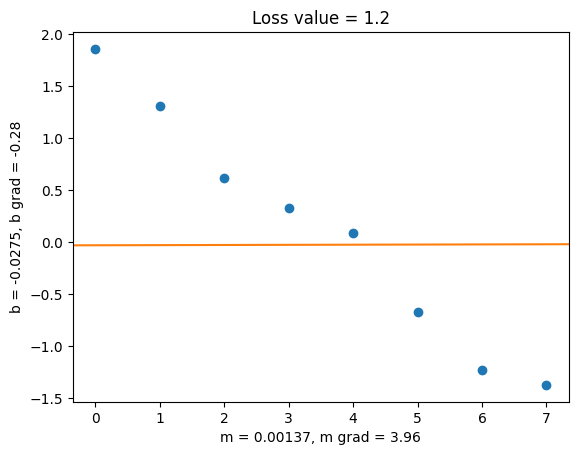

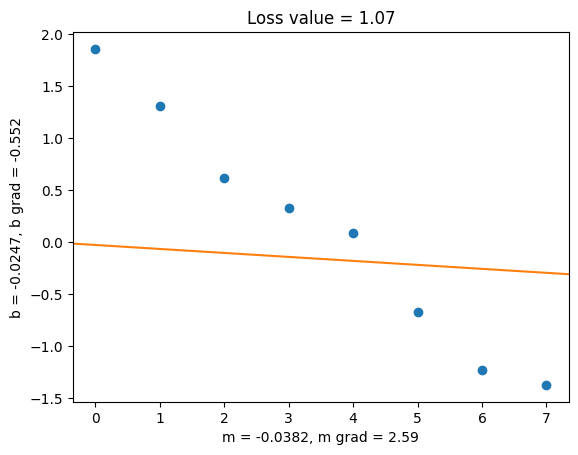

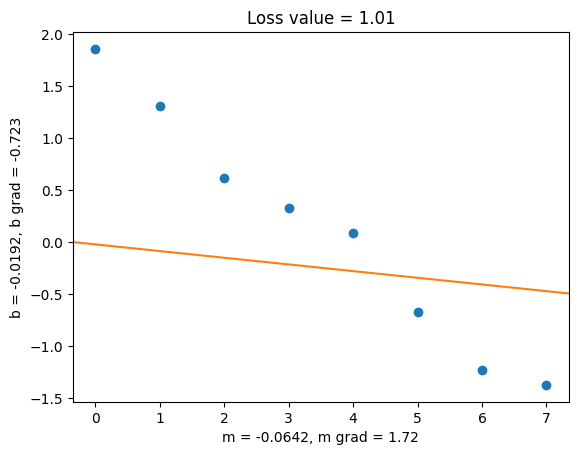

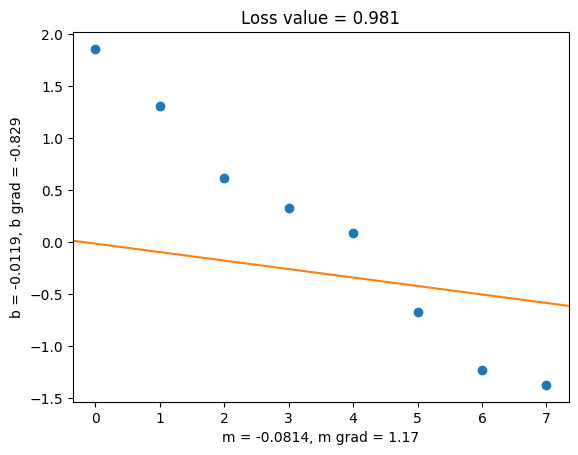

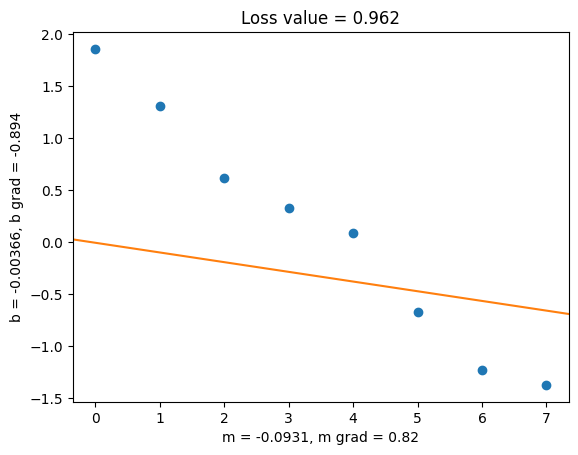

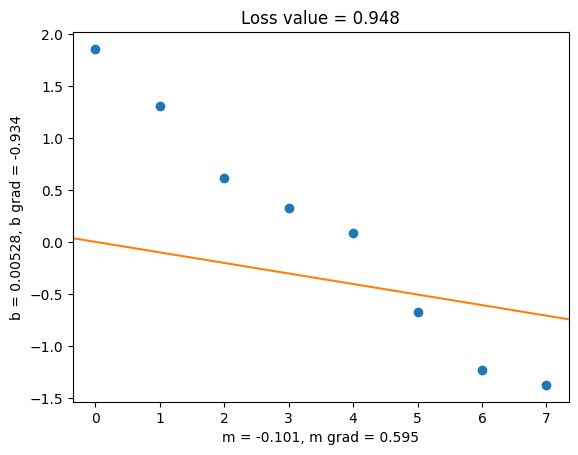

In [ ]:
epochs = 10  # Setting the number of training epochs
for epoch in range(epochs):  # Looping through each epoch

    yhats = regression(xs, m, b)  # Step 1: Predicting output values based on current model parameters (m and b)
    L = mse(yhats, ys)  # Step 2: Calculating the mean squared error (MSE) loss between predicted and actual output values

    L.backward()  # Step 3: Performing backpropagation to compute gradients of the loss function with respect to model parameters

    plot_regression(xs, ys, m, b, L)  # Visualizing the regression plot with labeled metrics

    gradient = torch.tensor([[b.grad.item(), m.grad.item()]]).T  # Extracting gradients for each model parameter (m and b)
    theta = torch.tensor([[b, m]]).T  # Creating a tensor to store current model parameters

    new_theta = theta - lr*gradient  # Step 4: Updating model parameters using gradient descent

    b = new_theta[0].requires_grad_()  # Updating the intercept parameter (b) with the new value and enabling gradient tracking
    m = new_theta[1].requires_grad_() # Updating the slope parameter (m) with the new value and enabling gradient tracking


In subsequent training iterations, once the model's slope $m$ approaches the slope indicated by the data, $\frac{\partial L}{\partial b}$ turns negative, indicating an inverse relationship between $b$ and the cost $L$. Meanwhile, $\frac{\partial L}{\partial m}$ remains positive.

This combination directs gradient descent to simultaneously increase the $y$-intercept $b$ and to decrease the slope $m$ in an effort to minimize the cost $L$ and, consequently, achieve a tighter fit of the regression line to the data.

Lastly, we will execute an additional thousand epochs (without generating plots) to converge towards the optimal parameters $\boldsymbol{\theta}$:

In [ ]:
epochs = 1000  # Setting the number of training epochs to 1000 to match the regression process in the referenced file
for epoch in range(epochs):  # Iterating through each epoch

    yhats = regression(xs, m, b)  # Step 1: Predicting output values based on current model parameters (m and b)
    L = mse(yhats, ys)  # Step 2: Calculating the mean squared error (MSE) loss between predicted and actual output values

    L.backward()  # Step 3: Performing backpropagation to compute gradients of the loss function with respect to model parameters

    # Printing the epoch number, loss value, and gradients of slope (m) and intercept (b)
    print('Epoch {}, loss value {}, m grad {}, b grad {}'.format(epoch, '%.3g' % L.item(), '%.3g' % m.grad.item(), '%.3g' % b.grad.item()))

    gradient = torch.tensor([[b.grad.item(), m.grad.item()]]).T  # Extracting gradients for each model parameter (m and b)
    theta = torch.tensor([[b, m]]).T  # Creating a tensor to store current model parameters

    new_theta = theta - lr*gradient  # Step 4: Updating model parameters using gradient descent

    b = new_theta[0].requires_grad_()  # Updating the intercept parameter (b) with the new value and enabling gradient tracking
    m = new_theta[1].requires_grad_()  # Updating the slope parameter (m) with the new value and enabling gradient tracking


Epoch 0, loss value 0.936, m grad 0.452, b grad -0.957
Epoch 1, loss value 0.925, m grad 0.361, b grad -0.969
Epoch 2, loss value 0.915, m grad 0.302, b grad -0.975
Epoch 3, loss value 0.904, m grad 0.265, b grad -0.977
Epoch 4, loss value 0.894, m grad 0.241, b grad -0.976
Epoch 5, loss value 0.884, m grad 0.225, b grad -0.973
Epoch 6, loss value 0.874, m grad 0.214, b grad -0.969
Epoch 7, loss value 0.864, m grad 0.207, b grad -0.965
Epoch 8, loss value 0.854, m grad 0.202, b grad -0.96
Epoch 9, loss value 0.845, m grad 0.199, b grad -0.955
Epoch 10, loss value 0.835, m grad 0.196, b grad -0.95
Epoch 11, loss value 0.826, m grad 0.194, b grad -0.945
Epoch 12, loss value 0.817, m grad 0.192, b grad -0.939
Epoch 13, loss value 0.808, m grad 0.191, b grad -0.934
Epoch 14, loss value 0.799, m grad 0.189, b grad -0.929
Epoch 15, loss value 0.79, m grad 0.188, b grad -0.923
Epoch 16, loss value 0.781, m grad 0.187, b grad -0.918
Epoch 17, loss value 0.772, m grad 0.186, b grad -0.913
Epoch

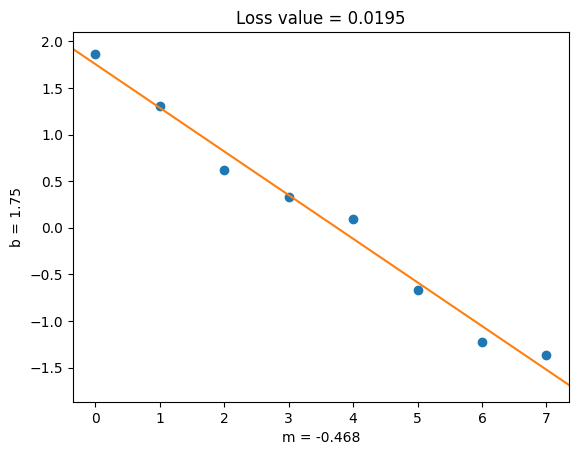

In [ ]:
plot_regression(xs, ys, m, b, L, include_grad=False)